In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import compute_class_weight

In [63]:
df = pd.read_csv("final_dataframe.csv", encoding='utf-8')

In [64]:
# labeling emotions
label_encoder = LabelEncoder()
df['emotion_label'] = label_encoder.fit_transform(df['annotator_emo'])

In [65]:
# dividing data into train and test
X = df.drop(['hash_id', 'audio_path', 'duration', 'annotator_emo',
             'golden_emo','annotator_id','speaker_emo','speaker_text','source_id','emotion_label'], axis=1)
y = df['emotion_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# class names
class_names = [str(cls) for cls in label_encoder.classes_]

# class weights
class_weights = compute_class_weight(class_weight='balanced',classes=y.unique(),y=y)
class_weights_dict = dict(zip(y.unique(), class_weights))

# Learning Emotion recognition by tonality voice

## Machine learning models

## SVM

In [66]:
svm = SVC(kernel='rbf', C=10.0, gamma='scale', probability=True, decision_function_shape='ovr',random_state=42,verbose=True, cache_size=1000, class_weight=class_weights_dict)
svm.fit(X_train_scaled, y_train)
y_probs_svm = svm.predict_proba(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"AUC on the test: {round(roc_auc_score(y_test, y_probs_svm, multi_class='ovr'), 3)}")
print(f'Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred_svm, target_names=class_names))

[LibSVM].......................................................................................................................................................*..................................................................*.*
optimization finished, #iter = 217971
obj = -214417.675797, rho = -0.639931
nSV = 41852, nBSV = 22477
Total nSV = 41852
....................................................................................................................................................*...................................................................*.*
optimization finished, #iter = 216050
obj = -214137.082740, rho = -0.645332
nSV = 41728, nBSV = 22494
Total nSV = 41728
..................................................................................................................................................*...............................................................*..*
optimization finished, #iter = 211576
obj = -214309.802667, rho = -0.662873
nSV = 41818, nBSV =

## Random forest

In [67]:
rf = RandomForestClassifier(min_samples_split=2, n_estimators=100, random_state=42, class_weight=class_weights_dict)
rf.fit(X_train, y_train)
y_probs_rf = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AUC on the test {round(roc_auc_score(y_test, y_probs_rf, multi_class='ovr'),3)}")
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=class_names))

AUC on the test 0.888
Accuracy: 0.73
              precision    recall  f1-score   support

       angry       0.77      0.80      0.78      6834
     neutral       0.76      0.71      0.73     13943
    positive       0.73      0.76      0.75      5617
         sad       0.58      0.65      0.61      3606

    accuracy                           0.73     30000
   macro avg       0.71      0.73      0.72     30000
weighted avg       0.74      0.73      0.73     30000



## XGBoost

In [68]:
!pip install xgboost
import xgboost as xgb


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [69]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0, objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)
y_probs_xgb = xgb_model.predict_proba(X_test)
y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"AUC on the test {round(roc_auc_score(y_test, y_probs_xgb, multi_class='ovr'),3)}")
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_xgb, target_names=class_names))

AUC on the test 0.649
Accuracy: 0.49
              precision    recall  f1-score   support

       angry       0.46      0.27      0.34      6834
     neutral       0.50      0.93      0.65     13943
    positive       0.00      0.00      0.00      5617
         sad       0.00      0.00      0.00      3606

    accuracy                           0.49     30000
   macro avg       0.24      0.30      0.25     30000
weighted avg       0.34      0.49      0.38     30000



/home/simon/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/simon/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/simon/.pyenv/versions/3.11.5/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## Catboost

In [70]:
!pip install catboost
from catboost import CatBoostClassifier


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [71]:
cat_model = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.01, class_weights=class_weights_dict)
cat_model.fit(X_train, y_train, verbose = 0)
probs = cat_model.predict_proba(X_test)
preds = cat_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"AUC on the test {round(roc_auc_score(y_test, probs, multi_class='ovr'),3)}")
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, preds, target_names=class_names))

AUC on the test 0.643
Accuracy: 0.31
              precision    recall  f1-score   support

       angry       0.37      0.44      0.40      6834
     neutral       0.55      0.20      0.29     13943
    positive       0.25      0.29      0.27      5617
         sad       0.18      0.54      0.27      3606

    accuracy                           0.31     30000
   macro avg       0.34      0.37      0.31     30000
weighted avg       0.41      0.31      0.31     30000



## Saving best models

In [72]:
import pickle

# Saving RandomForest
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Saving LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

## Deep learning models

### Data preparation

In [73]:
!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import OneCycleLR
from torch.nn.utils.clip_grad import clip_grad_norm_

X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

train_ds_torch = TensorDataset(X_train_torch, y_train_torch)
test_ds_troch = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_ds_torch, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds_troch, batch_size=32, shuffle=False)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Utils

In [128]:
def train_model(model, criterion, optimizer, scheduler, epochs=100):
    model.train()
    history = {'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()

            running_loss += loss.item() * x_batch.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

        epoch_loss = running_loss / total
        epoch_accuracy = correct / total

        history['train_loss'].append(epoch_loss)
        history['train_accuracy'].append(epoch_accuracy)

        val_loss, val_accuracy = evaluate_model(model, criterion)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_accuracy)
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {epoch_loss:.4f}, "
              f"Train Acc: {epoch_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, "
              f"Val Acc: {val_accuracy:.4f}")

    return history

def evaluate_model(model, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            running_loss += loss.item() * x_batch.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    val_loss = running_loss / total
    val_accuracy = correct / total
    return val_loss, val_accuracy


def plot_history(history, name):
    epochs = range(1, len(history['train_loss']) + 1)

    fig, axes = plt.subplots(2, 1, figsize=(8, 6))
    
    axes[0].plot(epochs, history['train_loss'], label=f'Train Loss {name}')
    axes[0].plot(epochs, history['val_loss'], label=f'Validation Loss {name}')
    axes[0].set_title('Loss over epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    axes[1].plot(epochs, history['train_accuracy'], label=f'Train Accuracy {name}')
    axes[1].plot(epochs, history['val_accuracy'], label=f'Validation Accuracy {name}')
    axes[1].set_title('Accuracy over epochs')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    fig.suptitle(name)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def get_classification_report_and_auc(model):
    model.eval()
    y_pred_list = []
    y_true_list = []
    y_prob_list = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            outputs = model(x_batch)
            probs = F.softmax(outputs, dim=1) 
            preds = outputs.argmax(dim=1)
            y_pred_list.append(preds.cpu())
            y_true_list.append(y_batch.cpu())
            y_prob_list.append(probs.cpu())

    y_pred = torch.cat(y_pred_list).numpy()
    y_true = torch.cat(y_true_list).numpy()
    y_probs = torch.cat(y_prob_list).numpy()
    print(f"AUC on the test: {round(roc_auc_score(y_true, y_probs, multi_class='ovr'), 3)}")
    print(classification_report(y_true, y_pred, target_names=class_names))

## Fully connected NN

In [119]:
class EmotionFCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EmotionFCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 416),
            nn.ReLU(),
            nn.BatchNorm1d(416),
            nn.Dropout(0.2),

            nn.Linear(416, 208),
            nn.ReLU(),
            nn.BatchNorm1d(208),
            nn.Dropout(0.1),


            nn.Linear(208, 104),
            nn.ReLU(),
            nn.BatchNorm1d(104),
            nn.Dropout(0.1),


            nn.Linear(104, 52),
            nn.ReLU(),
            nn.BatchNorm1d(52),
            nn.Dropout(0.1),
           
            nn.Linear(52, num_classes)
        )

    def forward(self, x):
        return self.net(x)


Epoch 1/100, Train Loss: 1.2873, Train Acc: 0.3537, Val Loss: 1.2404, Val Acc: 0.3777
Epoch 2/100, Train Loss: 1.1977, Train Acc: 0.4269, Val Loss: 1.1769, Val Acc: 0.4704
Epoch 3/100, Train Loss: 1.1309, Train Acc: 0.4712, Val Loss: 1.1429, Val Acc: 0.4649
Epoch 4/100, Train Loss: 1.0891, Train Acc: 0.4941, Val Loss: 1.1320, Val Acc: 0.4683
Epoch 5/100, Train Loss: 1.0683, Train Acc: 0.5047, Val Loss: 1.1158, Val Acc: 0.4927
Epoch 6/100, Train Loss: 1.0608, Train Acc: 0.5116, Val Loss: 1.1283, Val Acc: 0.4725
Epoch 7/100, Train Loss: 1.0621, Train Acc: 0.5124, Val Loss: 1.1175, Val Acc: 0.4585
Epoch 8/100, Train Loss: 1.0610, Train Acc: 0.5154, Val Loss: 1.1240, Val Acc: 0.4587
Epoch 9/100, Train Loss: 1.0630, Train Acc: 0.5094, Val Loss: 1.1172, Val Acc: 0.4755
Epoch 10/100, Train Loss: 1.0541, Train Acc: 0.5153, Val Loss: 1.1027, Val Acc: 0.5146
Epoch 11/100, Train Loss: 1.0411, Train Acc: 0.5218, Val Loss: 1.1105, Val Acc: 0.5431
Epoch 12/100, Train Loss: 1.0377, Train Acc: 0.5199,

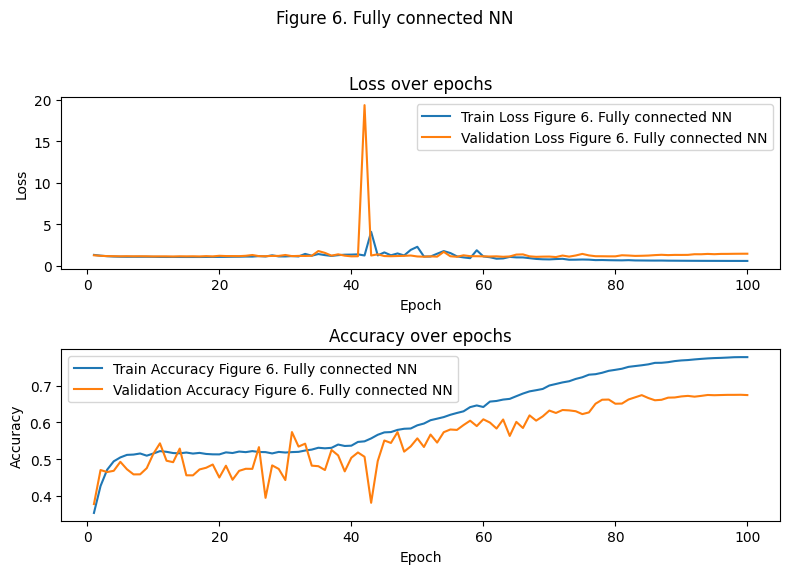

              precision    recall  f1-score   support

       angry       0.67      0.75      0.71      6154
     neutral       0.69      0.69      0.69     13812
    positive       0.71      0.62      0.66      6373
         sad       0.57      0.57      0.57      3661

    accuracy                           0.67     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.67      0.67      0.67     30000



In [ ]:
fcnn_model = EmotionFCNN(X_train.shape[1], len(torch.unique(y_train_torch)))
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32))
optimizer = optim.Adam(fcnn_model.parameters(), lr=1e-6)
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader),epochs=100)
fcnn_history = train_model(fcnn_model, criterion, optimizer, scheduler, epochs=100)
plot_history(fcnn_history, "Figure 6. Fully connected NN")


In [130]:
get_classification_report_and_auc(fcnn_model)

AUC on the test: 0.846
              precision    recall  f1-score   support

       angry       0.75      0.67      0.71      6834
     neutral       0.69      0.69      0.69     13943
    positive       0.62      0.71      0.66      5617
         sad       0.57      0.57      0.57      3606

    accuracy                           0.67     30000
   macro avg       0.66      0.66      0.66     30000
weighted avg       0.68      0.67      0.68     30000



## Convolutional NN

In [123]:
class EmotionCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EmotionCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 52, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(52),
            nn.Conv1d(52, 104, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(104),
            nn.Conv1d(104, 208, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(208),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(208, 416),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(416, num_classes)
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        return self.fc(x)

Epoch 1/100, Train Loss: 1.3711, Train Acc: 0.2848, Val Loss: 1.3569, Val Acc: 0.3109
Epoch 2/100, Train Loss: 1.3437, Train Acc: 0.3276, Val Loss: 1.3520, Val Acc: 0.2799
Epoch 3/100, Train Loss: 1.3205, Train Acc: 0.3580, Val Loss: 1.3081, Val Acc: 0.3726
Epoch 4/100, Train Loss: 1.2933, Train Acc: 0.3926, Val Loss: 1.2849, Val Acc: 0.4025
Epoch 5/100, Train Loss: 1.2663, Train Acc: 0.4169, Val Loss: 1.2845, Val Acc: 0.3752
Epoch 6/100, Train Loss: 1.2440, Train Acc: 0.4347, Val Loss: 1.2714, Val Acc: 0.4337
Epoch 7/100, Train Loss: 1.2265, Train Acc: 0.4496, Val Loss: 1.2570, Val Acc: 0.3956
Epoch 8/100, Train Loss: 1.2149, Train Acc: 0.4618, Val Loss: 1.2414, Val Acc: 0.4400
Epoch 9/100, Train Loss: 1.2037, Train Acc: 0.4699, Val Loss: 1.2470, Val Acc: 0.4541
Epoch 10/100, Train Loss: 1.1961, Train Acc: 0.4787, Val Loss: 1.2286, Val Acc: 0.4652
Epoch 11/100, Train Loss: 1.1918, Train Acc: 0.4848, Val Loss: 1.2446, Val Acc: 0.5026
Epoch 12/100, Train Loss: 1.1886, Train Acc: 0.4907,

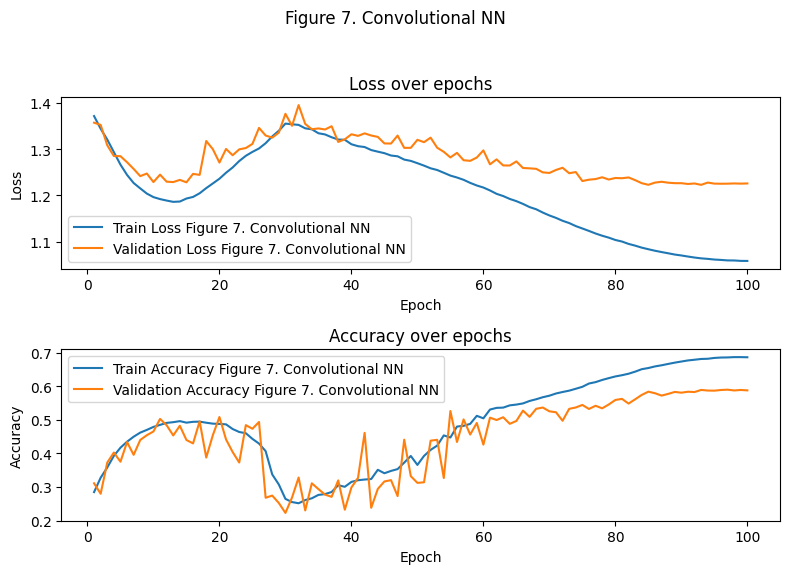

              precision    recall  f1-score   support

       angry       0.60      0.64      0.62      6416
     neutral       0.64      0.67      0.65     13241
    positive       0.55      0.42      0.48      7281
         sad       0.43      0.50      0.46      3062

    accuracy                           0.59     30000
   macro avg       0.55      0.56      0.55     30000
weighted avg       0.59      0.59      0.58     30000



In [ ]:
cnn_model = EmotionCNN(input_dim=X_train.shape[1], num_classes=len(torch.unique(y_train_torch)))
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, dtype=torch.float32), label_smoothing=0.1)
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-6)
scheduler = OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader),epochs=100)
cnn1d_history = train_model(cnn_model, criterion, optimizer, scheduler,epochs=100)
plot_history(cnn1d_history, "Figure 7. Convolutional NN")

In [ ]:
get_classification_report_and_auc(cnn_model)

## Saving best model

In [127]:
torch.save(fcnn_model.state_dict(), "fcnn_model.pth")